### Vertical Cross Section
https://wrf-python.readthedocs.io/en/latest/plot.html

In [19]:
import os, sys, datetime, string
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python/')
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python/MEPS/')
#sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/research_Haukeli/Python/WRF_python/src/')
#sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/research_Haukeli/Python/WRF_python/wrapt/src/wrapt')
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import simps

import createFolder as cF
#from matplotlib.cm import get_cmap
import matplotlib as mpl

import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset
import pandas as pd

from metpy.interpolate import cross_section
from mpl_toolkits.basemap import Basemap, cm

import matplotlib.colors as colors

import gdal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cbook import get_sample_data
import pandas as pd
from matplotlib.colors import LightSource
from pyproj import Proj, transform

import fcts_read_stat as rs


In [20]:
station = 'Haukeliseter'
savefig = 0
if savefig == 1:
    figdir = '../../Figures/Norway_map/%s/MEPS' %(station)
    cF.createFolder('%s/' %figdir)
form = 'png'

In [21]:
thredds      = 'http://thredds.met.no/thredds/dodsC/meps25epsarchive'
year = '2016'
month = '12'
day = '24'
met_files = ['meps_mbr0_pp_2_5km_',
             'meps_subset_2_5km_',
             'meps_mbr0_full_backup_2_5km_'
            ]
forecasttime = '00'

In [22]:
# Open the NetCDF file
Dataframe = Dataset('%s/%s/%s/%s/%s%s%s%sT%sZ.nc' %(thredds,year,month,day,met_files[0],year,month,day,forecasttime),
                                 'r')

In [23]:
stn_lat = 59.81
stn_lon = 7.21

In [24]:
alti= Dataframe.variables['altitude'][:]


x_wind = Dataframe.variables['x_wind_10m'][0,:,:]
y_wind = Dataframe.variables['y_wind_10m'][0,:,:]

In [25]:
## Latitudes
## [y = 949][x = 739]
latitude = Dataframe.variables['latitude'][:]

## Longitudes 
## [y = 949][x = 739]
longitude = Dataframe.variables['longitude'][:]

Dataframe.close()

pd.DataFrame(latitude)

pd.DataFrame(longitude)

close_lat = np.empty(shape=(latitude.shape))
close_lat[:] = np.nan
close_lat[:] = 59.81

close_lon = np.empty(shape=(longitude.shape))
close_lon[:] = np.nan
close_lon[:] = 6.9

close_lon_7 = np.empty(shape=(longitude.shape))
close_lon_7[:] = np.nan
close_lon_7[:] = 7.3

np.where(np.isclose(latitude[:,:], close_lat[:,:]))

longitude[np.where(np.isclose(longitude[:,:], close_lon[:,:]))]

latitude[np.where(np.isclose(latitude, close_lat))]

longitude[np.where(np.isclose(latitude, close_lat))]

lon_start = 3
lon_start = 6.8
lon_end = 15
lon_end = 7.4
lat_start = 57.5
lat_start = 59.7
lat_end = 64
lat_end = 60.
lon_0 = -(abs(lon_end)+abs(lon_start))/2
resolution = 'l'

In [26]:
def find_station_yx(latitude, longitude, stn_lat, stn_lon):
# find the absolute value of the difference between the  station's lat/lon with every point in the grid. 
# This tells us how close a point is to the particular latitude and longitude.
    abslat = np.abs(latitude[:,:]-stn_lat)
    abslon = np.abs(longitude[:,:]-stn_lon)

# Now we need to combine these two results. We will use numpy.maximum, which takes two arrays and finds the local 
# maximum.
    c = np.maximum(abslon, abslat)

# If you don't like flattened arrays, you can also get the row/column index like this
    y, x = np.where(c == np.min(c))
    return(x,y);


In [27]:
x, y = find_station_yx(latitude, longitude, stn_lat, stn_lon)

In [28]:
lon = np.array(np.arange(6.85,7.45,0.01))

In [29]:
xx = []
yy = []
for i in range(lon.shape[0]):
    x, y = find_station_yx(latitude, longitude, stn_lat, lon[i])
    xx.append(x)
    yy.append(y)
    
    #print(latitude[yy[i], xx[i]], longitude[yy[i],xx[i]])
    #print(yy[i],xx[i])

In [30]:
def Lambert_map(lllon, lllat, urlon, urlat, lat0, lon0, res='l', fill=False, zoom=False):
    """lllon - lon lower left corner ...
    lat0 - latitude standard parallel, should be somewhere in the center of the domain
    lon0 - the parallel longitude
    lllon - lower left longitude ...
    http://matplotlib.org/basemap/api/basemap_api.html"""
    rsphere=(6378137.00,6356752.3142)
    map = Basemap(llcrnrlon=lllon, llcrnrlat=lllat, urcrnrlon=urlon, urcrnrlat=urlat, rsphere=rsphere,
            resolution=res,area_thresh=1000.,projection='lcc', lat_0=lat0,lon_0=lon0)
#    map = Basemap(llcrnrlon=lllon, llcrnrlat=lllat, urcrnrlon=urlon, urcrnrlat=urlat, rsphere=rsphere,
 #           resolution=res,area_thresh=1000.,projection='lcc', lat_1=lllon,lon_0=lon0)
    # Draw the latitudes and the longitudes
#    parallels = np.arange(0.,90,5.)
 #   map.drawparallels(parallels,labels=[True,False,False,False],fontsize=16)    
  #  meridians = np.arange(10.,361.,10.)
   # map.drawmeridians(meridians,labels=[False,False,False,True],fontsize=16)
    if zoom == False:
        map.drawmeridians(np.arange(0,90,10),labels=[0,0,0,1],fontsize=16)
        map.drawparallels(np.arange(10,361,4),labels=[1,0,0,0],fontsize=16)
    else:
#        map.drawmeridians(np.arange(0,90,3),labels=[0,0,0,1],fontsize=16)
 #       map.drawparallels(np.arange(0,361,2),labels=[1,0,0,0],fontsize=16)
        map.drawmeridians(np.arange(0,90,0.1),labels=[0,0,0,1],fontsize=16)
        map.drawparallels(np.arange(0,361,0.05),labels=[1,0,0,0],fontsize=16)

    # Draw the coastline
    map.drawcoastlines()#color='0.5')
    
    

    if fill:
        map.drawlsmask(#land_color='0.8', 
            ocean_color='gainsboro')
    
#    if zoom == False:
    
    ### plot MEPS area
 #       for i in range(0,lato.shape[0],12):
  #          xs, ys = map(lono[i], lato[i])
   #         map.plot(xs,ys, color = 'orange', marker = 'o', markersize = 10, linestyle = '-', linewidth = 10)
    #    for i in range(0,lato2.shape[0],12):
     #       xs2, ys2 = map(lono2[i], lato2[i])
      #      map.plot(xs2,ys2, color = 'orange', marker = 'o', markersize = 10, linestyle = '-', linewidth = 10)

       # xs, ys = map(lono[739], lato[739])
        #map.plot(xs,ys, color = 'orange', marker ='o', markersize = 10, linestyle = '-', linewidth = 10, label = 'MEPS domain')
        #lgd = plt.legend(loc='lower left',fontsize=18)

    #map.drawmapboundary(fill_color='gainsboro')
        
    return map    


In [31]:
def PlotContours(Lon, Lat, psurf, map, nrlevels=10, leveldist=None,levels=None, numbers=True, color= 'k'):
    """ contours for example the pressure
    nrlevels - gives the number of displayed levels
    leveldist - gives distance between levels, if specified the nlevels is ignored
    levels - can be an array that specifies the levels to display, if specified nrlevels and leveldist are ignored
    numbers - True if the contours are labeled
    color - color of the contours (None is s color map)"""
    if levels is not None:
        cs= map.contour(Lon, Lat, psurf, levels, linewidths= 1. , colors= color)
    elif leveldist is not None:
        levels= np.arange(np.round(np.min(psurf)- np.min(psurf)%leveldist), np.round(np.max(psurf)+ leveldist), leveldist)
        cs= map.contour(Lon, Lat, psurf, levels, linewidths= 1. , colors= color)        
    else:
        cs= map.contour(Lon, Lat, psurf, nrlevels, linewidths= 1. , colors= color)#, colors= 6*['b']+ 6*['r'],)
    if numbers == True: plt.clabel(cs, fontsize=10, inline=1, fmt='%1.0f', color= 'black')
    #plt.tight_layout()

grid_x, grid_y = find_station_yx(latitude, longitude, 59+48.73/60, 7+12.87/60)
longitude[grid_y[0],grid_x[0]]
latitude[grid_y[0],grid_x[0]]

In [32]:
champ = 255.
no0 = np.array([0,155,88])/champ    #700
no1 = np.array([0,160,79])/champ    #750
no2 = np.array([0,164,72])/champ    #800
no3 = np.array([55,168,76])/champ    #850
no4 = np.array([81,171,79])/champ    #900
no5 = np.array([104,174,82])/champ    #950
no6 = np.array([119,177,84])/champ    #1000
no7 = np.array([136,180,85])/champ    #1050
no8 = np.array([151,183,87])/champ    #1100
no9 = np.array([165,185,88])/champ    #1150
no10 = np.array([179,187,89])/champ    #1200
no11 = np.array([185,180,92])/champ    #1250
no12 = np.array([190,173,94])/champ    #1300
no13 = np.array([197,164,98])/champ    #1350
no14 = np.array([205,168,117])/champ    #1400
no15 = np.array([214,173,134])/champ    #1450
no16 = np.array([223,180,154])/champ    #1500
no17 = np.array([231,190,174])/champ    #1550
no18 = np.array([239,204,195])/champ    #1600
no19 = np.array([246,221,220])/champ    #1650
no20 = np.array([252,241,242])/champ    #1700
no21 = np.array([255,255,255])/champ    #1750

no22 = np.array([80,80,81])/champ


no22 = np.array([80,80,81])/champ

In [33]:
for i in range(lon.shape[0]-1):
    if xx[i] == xx[i+1]:
        #print(i, xx[i], xx[i+1])
        xx[i] = np.nan

plot saved: ../../Figures/Norway_map/Haukeliseter/MEPS/cross_section


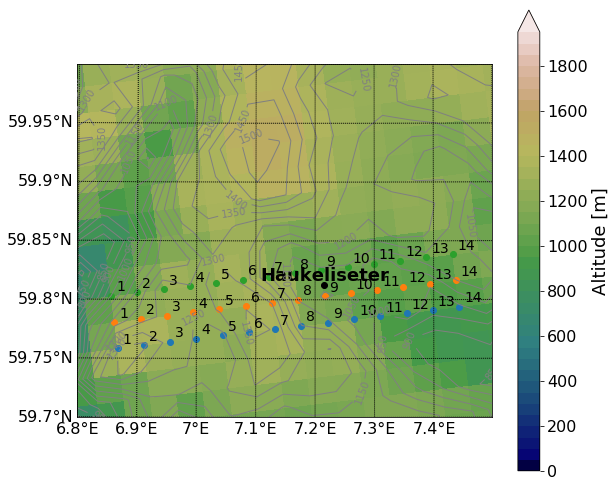

In [34]:
### Norway ###
#plt.figure(1)
fig = plt.figure(figsize=(9,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
#map = Lambert_map(lllon=0., lllat=49., urlon=50., urlat=72, lat0= 63.5, lon0= 15, res='l', fill=True,zoom=False)
#map = Lambert_map(lllon=longitude[0,:].min(), lllat=latitude[0,:].min(), 
 #                urlon=longitude[-1,:].max(), urlat=latitude[-1,:].max(), 
  #               lat0= 63.5, lon0= 15, res='l', fill=True,zoom=False)
map = Lambert_map(lllon=6.8, lllat=59.7, 
                  urlon=7.5, urlat=60., 
                  lat0= stn_lat, lon0= stn_lon, res='l', fill=True,zoom=True)

Lonpp,Latpp = map(longitude,latitude)
#alti[alti<3] = np.nan
#PlotContours(Lonpp, Latpp, alti, map, leveldist=None,levels=[0, 25, 50, 100, 200, 300, 400, 500, 600,1000,1500,2000], numbers=True, color= 'k')
#PlotColorMap4(Lonpp, Latpp, alti, map, bounds= [3, 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1250, 1500,],color='red', label='Altitude')

levels = np.arange(0,np.nanmax(alti),50)
norm = colors.BoundaryNorm(boundaries = levels, ncolors=plt.cm.gist_earth.N)

#cs = map.contourf(Lonpp, Latpp, alti, levels, norm=norm, cmap = plt.cm.gist_earth, extend='max')
cs = map.pcolormesh(Lonpp, Latpp, alti,cmap=plt.cm.gist_earth)
cb = plt.colorbar(cs, boundaries= levels, #location='right',
                  extend='max')
cb.set_label('Altitude [m]', size=18)    
cb.ax.tick_params(labelsize=16)
plt.gca().set_aspect('equal', adjustable='box')

#levels = np.arange(700,1800,50)
PlotContours(Lonpp, Latpp, alti, map, leveldist=None, levels=levels, numbers=True,color='gray')

namestat = ['Haukeliseter']
lonstat = [7+12.87/60]#,7.2]
latstat= [59+48.73/60]#,59.8]


xpt, ypt= map(lonstat, latstat)
map.plot(xpt,ypt,'ko')
for i in range(len(namestat)):
    plt.text(xpt[i]+100, ypt[i]+100, namestat[i], fontsize=18,fontweight='bold', 
             ha='center',va='bottom',color='black')
#plt.tight_layout(pad=2.5)  


x4, y4 = map(longitude[309,(np.array(xx)[~np.isnan(xx)]).astype(int)],
             latitude[309,(np.array(xx)[~np.isnan(xx)]).astype(int)])
map.scatter(x4,y4)
for i, (xl,yl) in enumerate(zip(x4, y4), start=1):
    ax.annotate(str(i), (xl,yl), xytext=(5,5), textcoords='offset points',fontsize=14)

x5, y5 = map(longitude[310,(np.array(xx)[~np.isnan(xx)]).astype(int)],
             latitude[310,(np.array(xx)[~np.isnan(xx)]).astype(int)])
map.scatter(x5,y5)
for i, (xl,yl) in enumerate(zip(x5, y5), start=1):
    ax.annotate(str(i), (xl,yl), xytext=(5,5), textcoords='offset points',fontsize=14)

    
x6, y6 = map(longitude[311,(np.array(xx)[~np.isnan(xx)]).astype(int)],
             latitude[311,(np.array(xx)[~np.isnan(xx)]).astype(int)])
map.scatter(x6,y6)
for i, (xl,yl) in enumerate(zip(x6, y6), start=1):
    ax.annotate(str(i), (xl,yl), xytext=(5,5), textcoords='offset points',fontsize=14)
    
if savefig == 1:
    cF.createFolder('%s/' %(figdir))
#    fig_name = 'winter_16_17_obs_hist_dens'
    fig_name = 'cross_section'
    plt.savefig('%s/%s.%s' %(figdir, fig_name,form), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(figdir, fig_name))
else:
    plt.show()

In [16]:
# Open the NetCDF file
fn = dict()
for i in range(1,np.shape(met_files)[0]):
    fn[i] = Dataset('%s/%s/%s/%s/%s%s%s%sT%sZ.nc' %(thredds,year,month,day,met_files[i],year,month,day,forecasttime),
                                 'r')
fn

{1: <class 'netCDF4._netCDF4.Dataset'>
 root group (NETCDF3_CLASSIC data model, file format DAP2):
     Conventions: CF-1.6
     institution: Norwegian Meteorological Institute, MET Norway
     creator_url: met.no
     summary: MEPS (MetCoOp-Ensemble Prediction System) is a convection-permitting atmosphere ensemble model covering Scandinavia and the Nordic Seas. It has horizontal resolution of 2.5 km, has 65 vertical levels and 10 members. MEPS is ran four times daily (00,06,12,18) with three-hourly cycling for data assimilation. Member 0 and 1 are ran up to 66 hours, the rest up to 48 hours. Boundary data is from ECMWF, and initial perturbations are based on the SLAF method. Model code based on HARMONIE cy40h1.1
     source: MEPS 2.5km
     min_time: 2016-12-24 00:00:00Z
     max_time: 2016-12-26
     geospatial_lat_min: 51.0
     geospatial_lat_max: 88.0
     geospatial_lon_min: -20.0
     geospatial_lon_max: 80.0
     references: unknown
     license: http://met.no/sb5-met.no/Forskn

In [17]:
## Latitudes
## [y = 949][x = 739]
latitude = fn[1].variables['latitude']

## Longitudes 
## [y = 949][x = 739]
longitude = fn[1].variables['longitude']

# Now find the absolute value of the difference between the  station's lat/lon with every point in the grid. 
x,y = rs.find_station_yx(latitude, longitude, stn_lat, stn_lon)
y = y[0]
x = x[0]

In [24]:
######## with Vertical Levels ( hybrid )#################################
## hybrid levels atmosphere_hybrid_sigma_pressure_coordinate
# formula: p(n,k,j,i) = ap(k) + b(k)*ps(n,j,i)
# positive: down


### variables to calculate pressure
#p0 = fn.variables['p0']    ## p0: p0

ap = fn[2].variables['ap']    ## ap: ap
b = fn[2].variables['b']      ## b: b


surface_air_pressure = fn[1].variables['surface_air_pressure'][:,:,0,309:312,(np.array(xx)[~np.isnan(xx)]).astype(int)]
air_temperature_0m   = fn[1].variables['air_temperature_0m'][:,:,0,309:312,(np.array(xx)[~np.isnan(xx)]).astype(int)]
air_temperature_ml   = fn[2].variables['air_temperature_ml'][:,:,0,309:312,(np.array(xx)[~np.isnan(xx)]).astype(int)]

In [28]:
pd.DataFrame(surface_air_pressure[0,0,:,:])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,92565.5,93951.0,95093.0,96047.5,94052.5,90007.5,88005.0,85439.5,85220.0,85570.5,84956.5,85018.0,85769.0,87148.5
1,91675.0,92146.0,93184.5,95738.5,95393.5,91196.0,88669.5,86784.0,87599.5,87798.0,86268.0,85785.5,86147.0,86770.0


In [242]:
### Transfer pressure coordinate
p_interface = np.empty(shape=air_temperature_ml.shape)
p_interface[:] = np.nan

p_interfaces2 = np.empty(shape=(p_interface.shape[0],
                                p_interface.shape[1]+1,
                                p_interface.shape[2],
                                p_interface.shape[3]))
p_interfaces2[:] = np.nan
####
p_ml = np.empty(shape=(p_interface.shape[0],
                               p_interface.shape[1],
                               p_interface.shape[2],
                               p_interface.shape[3]))
p_ml[:] = np.nan
#####
p_ml_final = np.empty(shape=(p_interface.shape[0],
                               p_interface.shape[1]+1,
                               p_interface.shape[2],
                               p_interface.shape[3]))
p_ml_final[:] = np.nan
#####
temperature_ml = np.empty(shape=(air_temperature_ml.shape[0],
                                 air_temperature_ml.shape[1]+1,
                                 air_temperature_ml.shape[2],
                                 air_temperature_ml.shape[3]))
#####
numT = np.empty(shape=(temperature_ml.shape))
numT[:] = np.nan
#####
denomT = np.empty(shape=(temperature_ml.shape))
denomT[:] = np.nan
####
for k in range(surface_air_pressure.shape[3]):
    for i in range(surface_air_pressure.shape[2]):
        p_interface[:,:,i,k] = ap[:]+b[:]*surface_air_pressure[:,:,i,k]
        
        ### 1) Connect interface values and surface values for pressure
        ### Pressure
        p_interfaces2[:,:,i,k] = np.concatenate((p_interface[:,:,i,k],
                                                 surface_air_pressure[:,:,i,k]),axis=1)

        
        for l in range(p_interfaces2.shape[1]-1):
            p_ml[:,l,i,k] = 1/2 * (p_interfaces2[:,l,i,k] + p_interfaces2[:,l+1,i,k])
        p_ml_final[:,:,i,k] = np.concatenate((p_ml[:,:,i,k], surface_air_pressure[:,:,i,k]),axis=1)
        ### --> Now the pressure is calculated at each model level
        
        ### 2) Connect model levels and surface values for temperature
        ### Temperature
        temperature_ml[:,:,i,k] = np.concatenate((air_temperature_ml[:,:,i,k],
                                                  air_temperature_0m[:,:,i,k]),axis=1)

        ### get thickness in m
        # Calculuate the thickness of each layer in m or geop height
        ### 3) to convert pressure-levels into actual heights use the hypsometric equation --> Temperature and pressure
        # are needed. After J. E. Martin: Mid-Latitude Atmospheric Dynamics Eq. 3.6
        Rd = 287.    # gas constant for dry air [J kg^-1 K^-1]
        g = 9.81     # Standard gravity [m s^-2]


        for l in range(temperature_ml.shape[1]):
            numT[:,l,i,k] = simps(y = temperature_ml[:temperature_ml.shape[0],l:(l+2),i,k],
                              x = np.log(p_ml_final[:temperature_ml.shape[0],l:(l+2),i,k]),
                              dx = np.log(p_ml_final[:temperature_ml.shape[0],l:(l+2),i,k]), 
                              even='last'
                                 )

            denomT[:,l,i,k] = simps(y = np.ones(temperature_ml[:temperature_ml.shape[0],l:(l+2),i,k].shape),
                      x = np.log(p_ml_final[:temperature_ml.shape[0],l:(l+2),i,k]),
                      dx = np.log(p_ml_final[:temperature_ml.shape[0],l:(l+2),i,k]),
                      even = 'last')

t_mean = (numT/denomT)
# get temperature and pressure, and value so that array zero contains low levels (transpose or flip), 
# but be CAREFUL later on since it is a 4d array
temp_mean = np.fliplr(t_mean[:,:,:,:])
pressure = np.fliplr(p_ml_final[:,:,:,:])
temperature_ml = np.fliplr(temperature_ml[:,:,:,:])

/opt/uio/modules/packages/python/Anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


In [240]:
pd.DataFrame(pressure[:temperature_ml.shape[0],:,0,0]/100)

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,925.655000,924.969844,922.911271,920.145984,917.319854,914.386950,911.305436,908.036775,904.544288,900.792736,...,198.900461,179.012919,159.210991,139.440675,119.666246,99.853739,79.971234,60.010091,40.006309,20.000532
1,926.204375,925.518812,923.459018,920.692089,917.864282,914.929637,911.846288,908.575674,905.081090,901.327273,...,198.926726,179.032244,159.224467,139.449380,119.671249,99.856105,79.972022,60.010222,40.006309,20.000532
2,926.247500,925.561905,923.502015,920.734957,917.907018,914.972236,911.888744,908.617976,905.123228,901.369233,...,198.928788,179.033761,159.225525,139.450063,119.671642,99.856291,79.972084,60.010233,40.006309,20.000532
3,926.411875,925.726158,923.665903,920.898354,918.069913,915.134610,912.050569,908.779217,905.283841,901.529169,...,198.936646,179.039543,159.229557,139.452668,119.673139,99.856999,79.972319,60.010272,40.006309,20.000532
4,927.684375,926.997717,924.934631,922.163281,919.330955,916.391618,913.303329,910.027451,906.527217,902.767300,...,198.997481,179.084305,159.260772,139.472830,119.684728,99.862480,79.974144,60.010575,40.006309,20.000532
5,927.681875,926.995218,924.932138,922.160796,919.328477,916.389148,913.300867,910.024999,906.524775,902.764868,...,198.997362,179.084217,159.260711,139.472791,119.684706,99.862469,79.974140,60.010575,40.006309,20.000532
6,926.694375,926.008449,923.947566,921.179173,918.349869,915.413671,912.328687,909.056330,905.559875,901.804039,...,198.950152,179.049481,159.236487,139.457144,119.675712,99.858216,79.972724,60.010339,40.006309,20.000532
7,926.960000,926.273878,924.212403,921.443217,918.613103,915.676062,912.590191,909.316889,905.819421,902.062490,...,198.962851,179.058824,159.243003,139.461353,119.678131,99.859360,79.973105,60.010403,40.006309,20.000532
8,927.344375,926.657968,924.595639,921.825304,918.994016,916.055757,912.968603,909.693935,906.194999,902.436483,...,198.981227,179.072345,159.252432,139.467443,119.681632,99.861016,79.973656,60.010494,40.006309,20.000532
9,927.715000,927.028319,924.965165,922.193724,919.361304,916.421870,913.333479,910.057492,906.557142,902.797098,...,198.998945,179.085382,159.261524,139.473315,119.685007,99.862612,79.974188,60.010583,40.006309,20.000532


In [252]:
t_mean.shape

(67, 66, 2, 14)

In [253]:
p_ml_final.shape

(67, 66, 2, 14)

In [257]:
for l in range(pressure.shape[1]-1):
    p1 = (pressure[:temperature_ml.shape[0],l,:,:])
    p2 = (pressure[:temperature_ml.shape[0],(l+1),:,:])

    dz = (Rd * t_mean[:temperature_ml.shape[0],l,:,:])/g *np.log((p1/p2))

In [258]:
dz.shape

(67, 2, 14)

In [ ]:
surface_air_pressure

In [ ]:
# Extract the model height and wind speed
z = fn.variables['hybrid'][:]
wspd = fn.variables['upward_air_velocity_ml'][0,:,0,:,:]
data = fn.variables['specific_humidity_ml'][0,:,0,:,:]

fn.close()

In [ ]:
x, y = find_station_yx(latitude, longitude, stn_lat, stn_lon)
y = y[0]
x = x[0]

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

contour = ax1.contourf(longitude[309,(np.array(xx)[~np.isnan(xx)]).astype(int)],
                       #np.flipud
                       (z),
                       np.flipud(data[:,309,(np.array(xx)[~np.isnan(xx)]).astype(int)]))
ax1.plot(longitude[309,(np.array(xx)[~np.isnan(xx)]).astype(int)],
         alti[309,(np.array(xx)[~np.isnan(xx)]).astype(int)],)
ax1.axvline(longitude[y,x], )
         #alti[y[0],x[0]], 'o')

In [ ]:
y, x

In [ ]:
x,y